# Optimizer Comparison Exercise
>Objective: Explore how different optimization algorithms affect the training of neural networks.

Optimizers are algorithms or methods used to change the attributes of the neural network, such as weights and learning rate, to reduce the losses. Common optimizers include SGD (Stochastic Gradient Descent), Mini-batch SGD, Momentum, Adam, and RMSProp.

**Comparison of Optimization Algorithms According to Google Bard**

| Algorithm | Strengths | Weaknesses |
|---|---|---|
| SGD | Simple, efficient | Can be slow to converge |
| Mini-batch SGD | Faster than SGD | Can be less stable than SGD |
| Momentum | Can accelerate convergence | Can overshoot the minimum |
| Adam | Efficient, well-behaved | Can be sensitive to hyperparameter tuning |
| RMSProp | Efficient, stable | Can be slow to converge |

# Part 1: Classification task

## Setup
Start by importing necessary libraries and preparing a simple dataset.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Load or create a dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2023-12-02 14:38:52.843783: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Building the Neural Network
Define a function to create a basic neural network. This function will take an optimizer as an argument. Define the network yourself with 2 hidden layers using 64 nodes each. They should both use relu as activation function. Dont forget the output layer which, for a binary classification problem should use what activation function?

In [3]:
X_train.shape, y_train.shape

((800, 20), (800,))

In [4]:
def build_model(optimizer):
    inputs = tf.keras.layers.Input(shape=(20,))
    hidden_1 = tf.keras.layers.Dense(64, activation='relu')(inputs)
    hidden_2 = tf.keras.layers.Dense(64, activation='relu')(hidden_1)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_2)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

## Experimentation
Experiment with different optimizers. For each optimizer, train the model and plot its accuracy and loss.

### Task:
1. Try the following optimizers: 'sgd', 'adam', 'rmsprop', and a custom SGD with Momentum.
2. For the custom SGD with Momentum, use: tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
3. Train each model for a fixed number of epochs (e.g., 30) and evaluate its performance on the test set.
4. Do step 1-3 same, but change batch size.

In [5]:
def test_batch_sizes(batch_size, epochs=30):
    optimizers = ['SGD', 'Adam', 'RMSprop', 'SGD_momentum']
    histories = {}

    for opt in optimizers:
        print(f"Training with optimizer: {opt}, {batch_size=}, {epochs=}")
        if opt=="SGD_momentum": 
            model = build_model(tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9))
        else:
            model = build_model(opt.lower())
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=0, batch_size=batch_size)

        train_acc = np.max(history.history['accuracy'])
        val_acc = np.max(history.history['val_accuracy'])
        print(f"Max Training   Accuracy: {train_acc:.9f}    Final: {history.history['accuracy'][-1]:.9f}")
        print(f"Max Validation Accuracy: {val_acc:.9f}    Final: {history.history['val_accuracy'][-1]:.9f}")
        print()

        histories[str(opt)] = history

    return histories

histories = test_batch_sizes(32) # Default batch size

Training with optimizer: SGD, batch_size=32, epochs=30
Max Training   Accuracy: 0.893750012    Final: 0.889999986
Max Validation Accuracy: 0.860000014    Final: 0.860000014

Training with optimizer: Adam, batch_size=32, epochs=30
Max Training   Accuracy: 0.980000019    Final: 0.978749990
Max Validation Accuracy: 0.865000010    Final: 0.824999988

Training with optimizer: RMSprop, batch_size=32, epochs=30
Max Training   Accuracy: 0.966250002    Final: 0.966250002
Max Validation Accuracy: 0.879999995    Final: 0.824999988

Training with optimizer: SGD_momentum, batch_size=32, epochs=30
Max Training   Accuracy: 0.963750005    Final: 0.963750005
Max Validation Accuracy: 0.839999974    Final: 0.814999998



## Visualization
Plot the training and validation accuracy and loss for each optimizer.

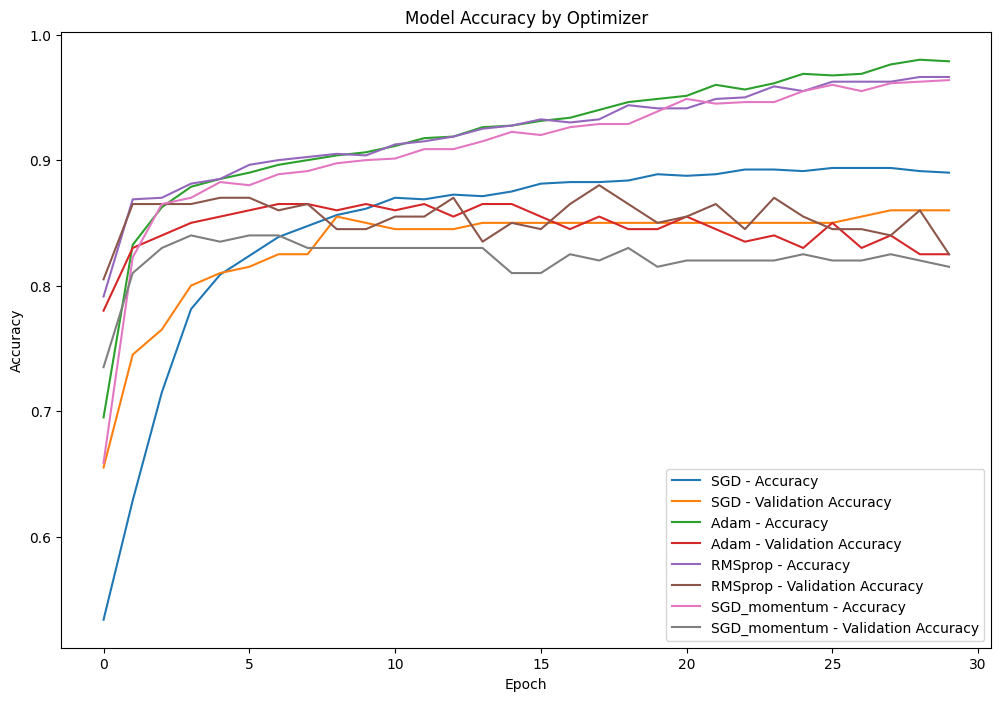

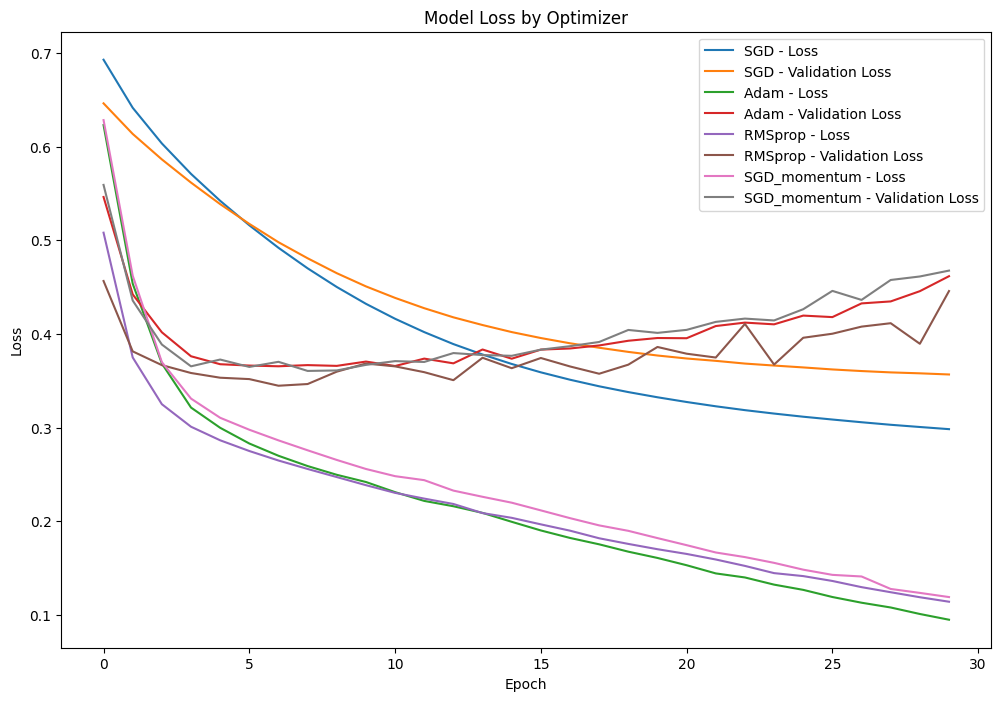

In [6]:
plt.figure(figsize=(12, 8))
for opt, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{opt} - Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{opt} - Validation Accuracy')
plt.title('Model Accuracy by Optimizer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
for opt, history in histories.items():
    plt.plot(history.history['loss'], label=f'{opt} - Loss')
    plt.plot(history.history['val_loss'], label=f'{opt} - Validation Loss')
plt.title('Model Loss by Optimizer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plotly_go(histories, header="Batch: 32, Epochs: 30"):
    x_len = len(histories["SGD"].history['loss']) + 1
    fig = make_subplots(rows=2, cols=1, subplot_titles=('Model Accuracy by Optimizer', 'Model Loss by Optimizer'))

    # Accuracy
    for opt, history in histories.items():
        fig.add_trace(go.Scatter(x=list(range(1, x_len)), y=history.history['accuracy'], mode='lines', name=f'{opt} - Accuracy'), row=1, col=1)
        fig.add_trace(go.Scatter(x=list(range(1, x_len)), y=history.history['val_accuracy'], mode='lines', name=f'{opt} - Validation Accuracy'), row=1, col=1)

    # Loss
    for opt, history in histories.items():
        fig.add_trace(go.Scatter(x=list(range(1, x_len)), y=history.history['loss'], mode='lines', name=f'{opt} - Loss'), row=2, col=1)
        fig.add_trace(go.Scatter(x=list(range(1, x_len)), y=history.history['val_loss'], mode='lines', name=f'{opt} - Validation Loss'), row=2, col=1)

    fig.update_layout(title_text=f'Training Metrics: {header}', height=800, width=800)
    fig.show()

plotly_go(histories)


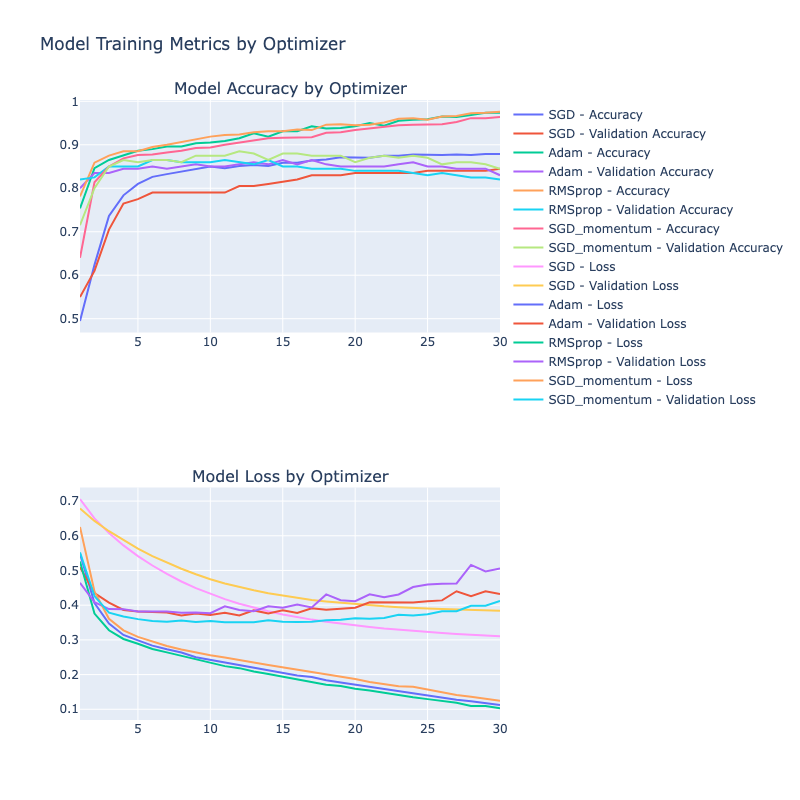

## Analysis

#### **Binary Classification - sklearn dataset: make_classification (1000 samples, 20 features, 2 classes)**

#### Rough estimate of accuracy convergence (max 30 epochs), default batch_size (32):

- SGD yields a pretty similar convergence for both test and val around 15 epochs with a decent value of 0.85.

- Adam converges slower but with higher accuracy.

- RMSprop and SGD_momentum are not notably performing any differently than Adam.

Interestingly, the validation accuracy for all optimizers except SGD seems to drop as the epochs increase, hinting at some kind of overfitting.

In [8]:
hist_120_epochs_batch_32 = test_batch_sizes(batch_size=32, epochs=120) # Increased epochs

Training with optimizer: SGD, batch_size=32, epochs=120
Max Training   Accuracy: 0.922500014    Final: 0.920000017
Max Validation Accuracy: 0.845000029    Final: 0.834999979

Training with optimizer: Adam, batch_size=32, epochs=120
Max Training   Accuracy: 1.000000000    Final: 1.000000000
Max Validation Accuracy: 0.855000019    Final: 0.829999983

Training with optimizer: RMSprop, batch_size=32, epochs=120
Max Training   Accuracy: 1.000000000    Final: 1.000000000
Max Validation Accuracy: 0.865000010    Final: 0.819999993

Training with optimizer: SGD_momentum, batch_size=32, epochs=120
Max Training   Accuracy: 1.000000000    Final: 1.000000000
Max Validation Accuracy: 0.899999976    Final: 0.845000029



In [9]:
plotly_go(hist_120_epochs_batch_32, "Batch: 32, Epochs: 120")

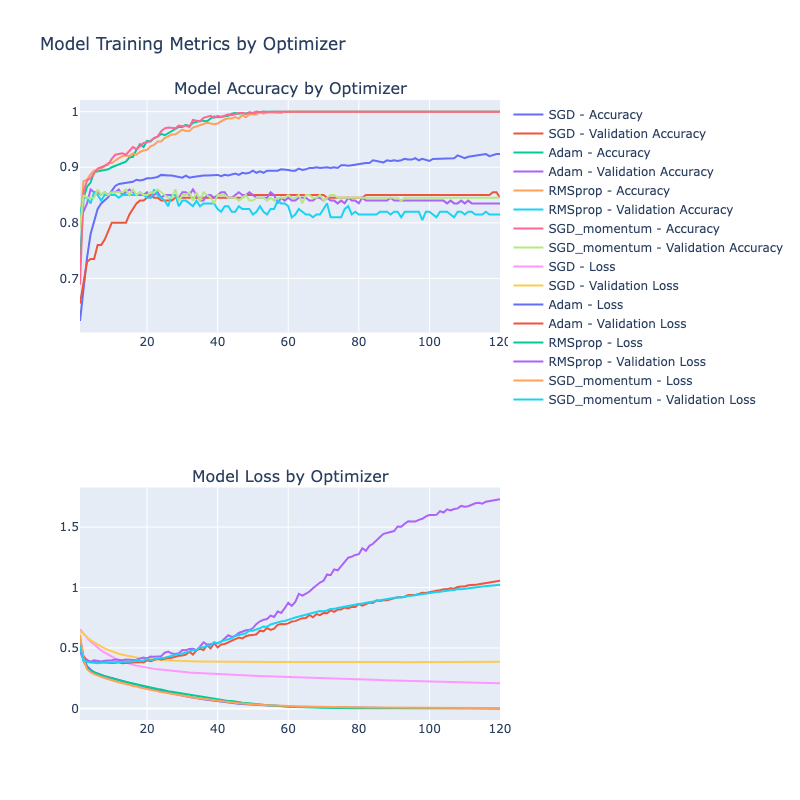

#### 120 epochs, same batch size

Very nice! Adam, RMSProp & SGD_momentum performed perfectly on test data after ~60 epochs.

The loss was very weird with RMSProp, it reached a high of 1.7 at the last 120th epoch.

In [10]:
hist_30_epochs_batch_64 = test_batch_sizes(batch_size=64, epochs=30) # Increased batch size

Training with optimizer: SGD, batch_size=64, epochs=30
Max Training   Accuracy: 0.868749976    Final: 0.868749976
Max Validation Accuracy: 0.845000029    Final: 0.839999974

Training with optimizer: Adam, batch_size=64, epochs=30
Max Training   Accuracy: 0.959999979    Final: 0.959999979
Max Validation Accuracy: 0.865000010    Final: 0.845000029

Training with optimizer: RMSprop, batch_size=64, epochs=30
Max Training   Accuracy: 0.951250017    Final: 0.951250017
Max Validation Accuracy: 0.884999990    Final: 0.865000010

Training with optimizer: SGD_momentum, batch_size=64, epochs=30
Max Training   Accuracy: 0.939999998    Final: 0.939999998
Max Validation Accuracy: 0.870000005    Final: 0.839999974



In [11]:
plotly_go(hist_30_epochs_batch_64, "Batch 64, Epochs: 30")

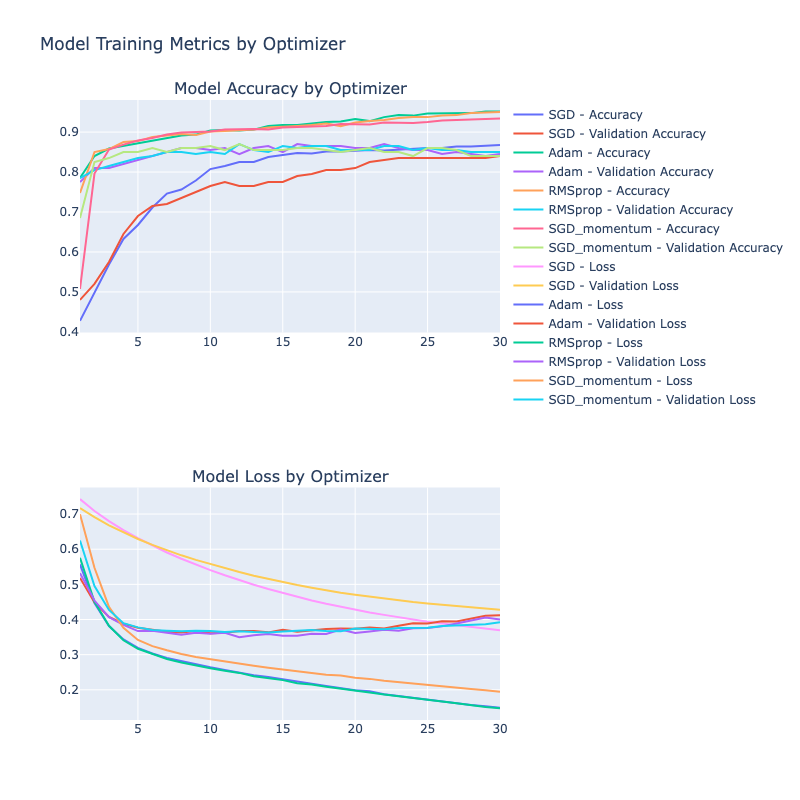

Nothing noteworthy by changing batch size on this model/data. Performs very similar to default 32 batch size.

# Part 2: Regression task
Now, let's apply the same set of optimizers to a regression problem.

## Setup for Regression
Import libraries and prepare a regression dataset. For simplicity, let's use a synthetic dataset.
[scikit learn: make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)

In [59]:
from sklearn.datasets import make_regression

# Generate synthetic data for regression
X_reg, y_reg = make_regression(n_samples=500, n_features=2, noise=15, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)


In [60]:
X_reg.shape, y_reg.shape, X_reg[0].shape

((500, 2), (500,), (2,))

In [61]:
X_reg[0], X_reg[-1], np.max(X_reg), np.min(X_reg)

(array([0.61058575, 0.38019785]),
 array([-0.31026676,  0.68195297]),
 3.852731490654721,
 -3.2412673400690726)

## Define the Neural Network Model for Regression
Create a function to build a neural network model suitable for regression. Use 2 hidden layeres of 10 nodes each both using relu activations. Dont forget the output layer. For regression it is recommended to use MSE as loss and metric.

In [62]:
def build_model_regression(optimizer):
    inputs = tf.keras.layers.Input(shape=(2,))
    hidden_1 = tf.keras.layers.Dense(10, activation='relu')(inputs)
    hidden_2 = tf.keras.layers.Dense(10, activation='relu')(hidden_1)
    outputs = tf.keras.layers.Dense(1, activation='linear')(hidden_2)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])
    return model

In [63]:
m = build_model_regression('sgd')

In [64]:
m.summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_55 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_162 (Dense)           (None, 10)                30        
                                                                 
 dense_163 (Dense)           (None, 10)                110       
                                                                 
 dense_164 (Dense)           (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Experiment with Different Optimizers for Regression
Repeat the same process as in the classification task, but now for regression.


In [65]:
optimizers = ['SGD', 'Adam', 'RMSprop', 'SGD_momentum']
history_dict_reg = {}

for opt in optimizers:
    print(f"Training (Regression) with optimizer: {opt}")
    if opt=="SGD_momentum": 
        model = build_model_regression(tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9))
    else:
        model = build_model_regression(opt.lower())
    history = model.fit(X_train_reg, y_train_reg, epochs=100, validation_split=0.2, verbose=0)
    history_dict_reg[opt] = history

    # Evaluate the model
    test_loss, test_mse = model.evaluate(X_test_reg, y_test_reg, verbose=0)
    print(f"Test MSE with {opt}: {test_mse:.4f}\n")


Training (Regression) with optimizer: SGD
Test MSE with SGD: 630.5254

Training (Regression) with optimizer: Adam
Test MSE with Adam: 245.8696

Training (Regression) with optimizer: RMSprop
Test MSE with RMSprop: 250.6321

Training (Regression) with optimizer: SGD_momentum
Test MSE with SGD_momentum: 629.6565



Unreasonably high MSE??

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from scikeras.wrappers import KerasRegressor
import tqdm

def build_model(optimizer='adam'):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])
    return model

regressor = KerasRegressor(model=build_model, epochs=100, batch_size=32, verbose=0)

param_grid = {'regressor__optimizer': ['sgd', 'adam', 'rmsprop']}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', regressor)
])

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error', verbose=1)

grid_search.fit(X_train_reg, y_train_reg)

print("Best optimizer: ", grid_search.best_params_)
print("Best MSE: ", -grid_search.best_score_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best optimizer:  {'regressor__optimizer': 'sgd'}
Best MSE:  248.72514768176572


## Visualization of Results for Regression
Plot the training and validation loss (MSE) for each optimizer.

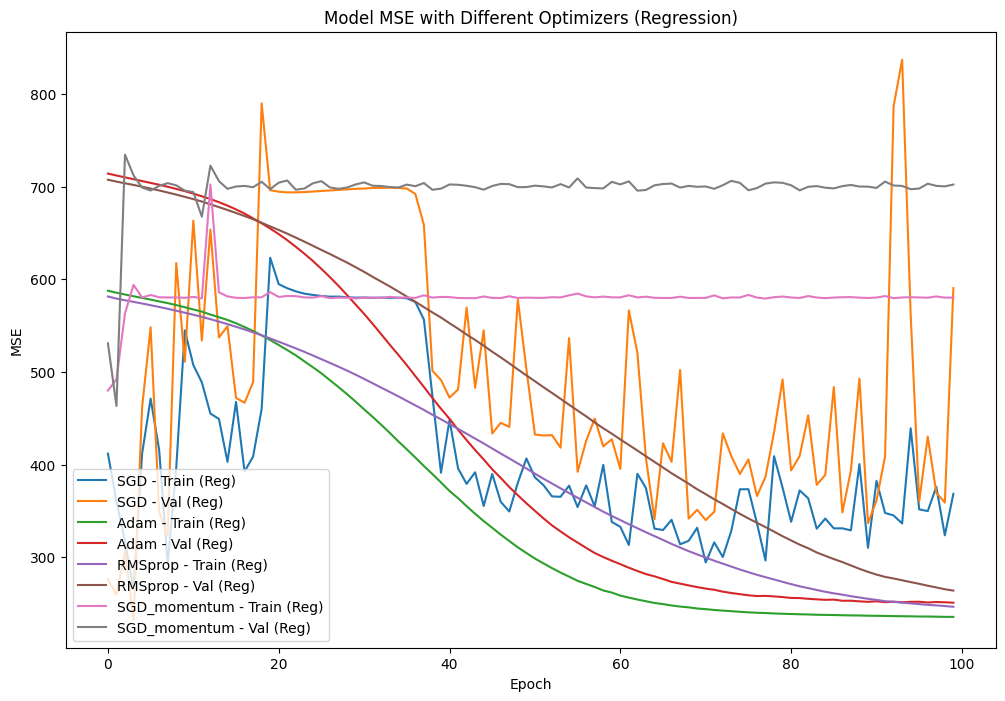

In [19]:
plt.figure(figsize=(12, 8))
for opt, history in history_dict_reg.items():
    plt.plot(history.history['mse'], label=f'{opt} - Train (Reg)')
    plt.plot(history.history['val_mse'], label=f'{opt} - Val (Reg)')

plt.title('Model MSE with Different Optimizers (Regression)')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [29]:
history_dict_reg.items()

dict_items([('SGD', <keras.src.callbacks.History object at 0x13a0f28d0>), ('Adam', <keras.src.callbacks.History object at 0x13ba1a7d0>), ('RMSprop', <keras.src.callbacks.History object at 0x13bd6f1d0>), ('SGD_momentum', <keras.src.callbacks.History object at 0x13c0227d0>)])

In [30]:
fig = go.Figure()

for opt, history in history_dict_reg.items():
    fig.add_trace(go.Scatter(x=list(range(1, len(history.history['mse']) + 1)),
                             y=history.history['mse'],
                             mode='lines',
                             name=f'{opt} - MSE'))
    fig.add_trace(go.Scatter(x=list(range(1, len(history.history['val_mse']) + 1)),
                             y=history.history['val_mse'],
                             mode='lines',
                             name=f'{opt} - Validation'))

fig.update_layout(title_text='Training Metrics: MSE ',
                  xaxis_title='Epoch',
                  yaxis_title='MSE',
                  showlegend=True)
fig.show()

I'm not sure why the MSE is so high. #TODO

## Analysis and Questions
* Compare the performance of the optimizers between the classification and regression tasks.
* Did certain optimizers perform better on one task than the other? Why might this be?
* Discuss the implications of these findings for selecting optimizers in real-world applications.

## Conclusion
Reflect on the importance of understanding the strengths and limitations of different optimizers in relation to the specific nature of the problem and dataset.